# Importing all Libraries

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Loading Data

In [3]:
data = pd.read_csv("mushrooms.csv")
data.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


Checking null values

In [4]:

data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
#checking the number of unique values
data['class'].unique()

array(['p', 'e'], dtype=object)

Thus we have two claasification. Either the mushroom is poisonous or edible

In [6]:
data.shape

(8124, 23)

Thus we have 22 features(1st one is label) and 8124 instances.Now let us check which features constitutes maximum information.

We can see that the dataset has values in strings.We need to convert all the unique values to integers. Thus we perform label encoding on the data.

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Checking the encoded values

In [8]:
data['stalk-color-above-ring'].unique()

array([7, 3, 6, 4, 0, 2, 5, 1, 8], dtype=int64)

In [9]:
print(data.groupby('class').size())

class
0    4208
1    3916
dtype: int64


Separating features and label

In [12]:
X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [13]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [14]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [15]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


Standardising the data

In [16]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ..., 
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

Principal Component Analysis

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ -5.74321902e-01,  -9.75781349e-01,  -1.22176154e+00, ...,
         -2.08581362e-01,   8.13996758e-03,  -2.98716006e-17],
       [ -2.28210230e+00,   2.79066333e-01,  -1.20049669e+00, ...,
          1.52238789e-01,  -1.96446132e-01,   8.17047124e-17],
       [ -1.85803562e+00,  -2.70972362e-01,  -1.37237069e+00, ...,
          2.57581784e-01,  -3.62577199e-01,   3.62451933e-17],
       ..., 
       [ -1.62151632e+00,  -7.57536709e-01,   2.73357994e+00, ...,
         -1.42532241e+00,   6.36990122e-01,   1.31607921e-18],
       [  3.67060561e+00,  -1.03277450e+00,   1.68459501e-01, ...,
          9.41440123e-02,  -6.43462238e-02,  -7.47641463e-20],
       [ -1.57520272e+00,  -1.22858140e+00,   2.44722789e+00, ...,
         -8.04626064e-01,   5.90315263e-01,   1.39554149e-19]])

In [18]:
#covariance
covariance=pca.get_covariance()


In [19]:
explained_variance=pca.explained_variance_
explained_variance

array([  3.87410924e+00,   2.60339434e+00,   2.40073834e+00,
         2.16674719e+00,   1.70303181e+00,   1.39495575e+00,
         9.78803667e-01,   9.51936841e-01,   7.70036405e-01,
         7.11748353e-01,   5.77556532e-01,   5.42484855e-01,
         5.09631267e-01,   4.77214086e-01,   3.84467203e-01,
         3.11228233e-01,   2.18649656e-01,   1.59514884e-01,
         1.31521687e-01,   7.31993474e-02,   6.16155691e-02,
         2.78307611e-33])

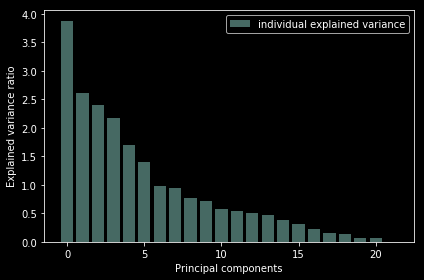

In [22]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

We can see that the last 4 components has less amount of variance of the data.The 1st 17 components retains more than 90% of the data.

Performing PCA by taking 17 components with maximum Variance

In [23]:
pca_modified=PCA(n_components=17)
pca_modified.fit_transform(X)

array([[-0.5743219 , -0.97578135, -1.22176154, ..., -0.51996599,
        -0.78254366,  1.12025933],
       [-2.2821023 ,  0.27906633, -1.20049669, ..., -0.11307822,
        -0.73093408, -0.01817413],
       [-1.85803562, -0.27097236, -1.37237069, ...,  0.01652548,
        -0.6561675 ,  0.10791396],
       ..., 
       [-1.62151632, -0.75753671,  2.73357994, ..., -0.51961303,
        -0.70768708,  0.22578534],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ..., -0.08688401,
        -0.11464249, -0.14801392],
       [-1.57520272, -1.2285814 ,  2.44722789, ...,  0.91606764,
        -0.77988482, -0.30141893]])

Splitting the data into training and testing dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# Default Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [26]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)

1.0

In [28]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]], dtype=int64)

In [29]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.95793885601577911

In [30]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9902988924290701

Text(0.5,0,'False Positive Rate')

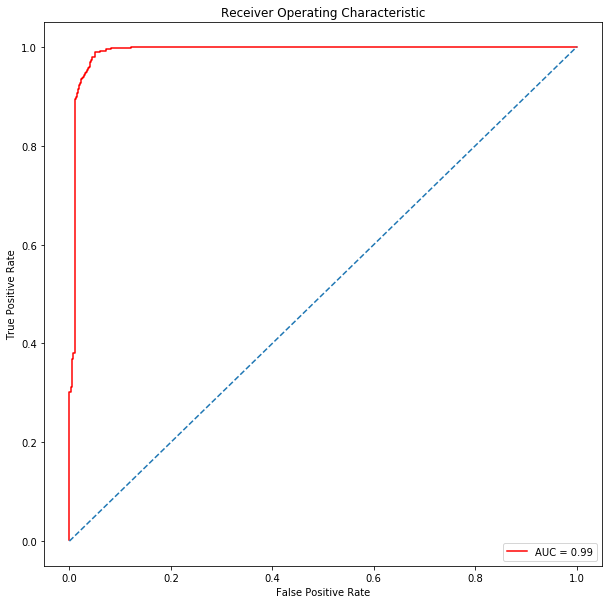

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Logistic Regression(Tuned model)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

L1 and L2 are regularization parameters.They're used to avoid overfiting.Both L1 and L2 regularization prevents overfitting by shrinking (imposing a penalty) on the coefficients.

L1 is the first moment norm |x1-x2| (|w| for regularization case) that is simply the absolute dıstance between two points where 

L2 is second moment norm corresponding to Eucledian Distance that is |x1-x2|^2 (|w|^2 for regularization case).

In simple words,L2 (Ridge) shrinks all the coefficient by the same proportions but eliminates none, while L1 (Lasso) can shrink some coefficients to zero, performing variable selection. If all the features are correlated with the label, ridge outperforms lasso, as the coefficients are never zero in ridge. If only a subset of features are correlated with the label, lasso outperforms ridge as in lasso model some coefficient can be shrunken to zero.

In [33]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=10)

In [34]:
LR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
print(LR.best_params_)

{'C': 100, 'penalty': 'l2'}


In [36]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_pred)

1.0

In [37]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[824,  21],
       [ 23, 757]], dtype=int64)

In [38]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.97      0.98      0.97       845\n          1       0.97      0.97      0.97       780\n\navg / total       0.97      0.97      0.97      1625\n'

In [39]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9728303747534518

In [40]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.99162494310423299

Text(0.5,0,'False Positive Rate')

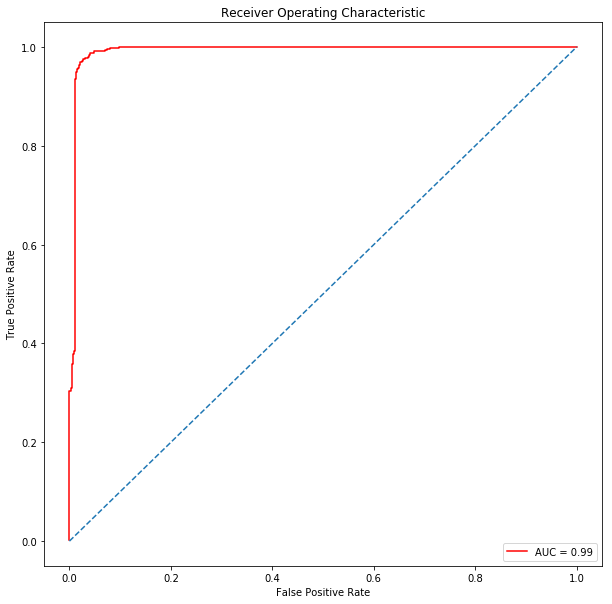

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [42]:
LR_ridge= LogisticRegression(penalty='l2')
LR_ridge.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
y_prob = LR_ridge.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR_ridge.score(X_test, y_pred)

1.0

In [44]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]], dtype=int64)

In [45]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.96      0.96      0.96       845\n          1       0.96      0.95      0.96       780\n\navg / total       0.96      0.96      0.96      1625\n'

In [46]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9902988924290701

Text(0.5,0,'False Positive Rate')

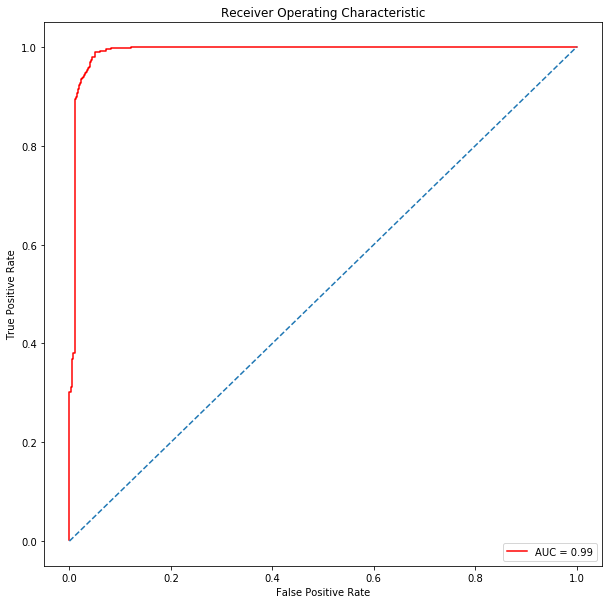

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Gaussian Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB(priors=None)

In [50]:
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_pred)

1.0

In [51]:
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 1625 points : 111


In [52]:
scores = cross_val_score(model_naive, X, y, cv=10, scoring='accuracy')
print(scores)

[ 0.59778598  0.78843788  0.97908979  0.9803198   0.84870849  0.81303813
  0.81034483  0.81650246  0.85326757  0.97533909]


In [53]:
scores.mean()

0.84628340228874954

In [54]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[786,  59],
       [ 52, 728]], dtype=int64)

In [55]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.94      0.93      0.93       845\n          1       0.93      0.93      0.93       780\n\navg / total       0.93      0.93      0.93      1625\n'

In [56]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9317554240631164

In [57]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9592201486876043

Text(0.5,0,'False Positive Rate')

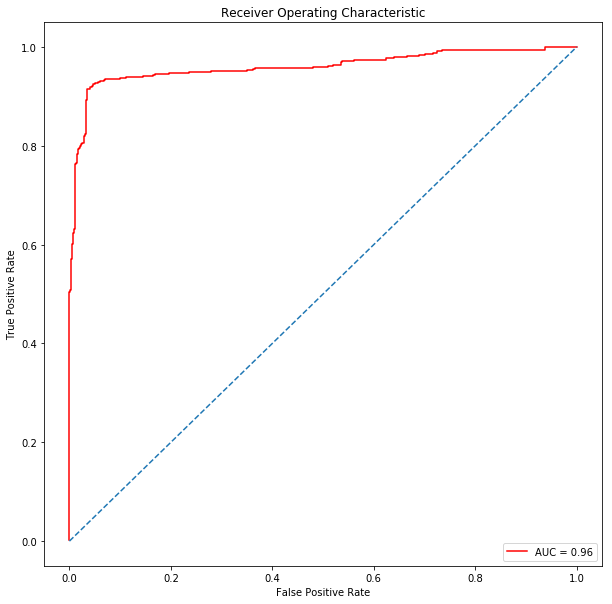

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Support Vector Machine

In [60]:
from sklearn.svm import SVC
svm_model= SVC()

The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

# Support Vector Machine without polynomial kernel

In [61]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 #'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [62]:
from sklearn.grid_search import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

C:\Users\velpu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\velpu\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [63]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

1.0


In [64]:
print(model_svm.grid_scores_)

[mean: 0.94784, std: 0.00840, params: {'kernel': 'rbf', 'gamma': 0.001, 'C': 1}, mean: 0.99031, std: 0.00372, params: {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 1, 'C': 1000}, mean: 0.94738, std: 0.00972, params: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 0.01, 'C': 500}, mean: 0.97615, std: 0.00607, params: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 1, 'C': 1}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 1, 'C': 500}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 1, 'C': 100}, mean: 1.00000, std: 0.00000, params: {'kernel': 'rbf', 'gamma': 1, 'C': 10}, mean: 1.00000, std: 0.00000, params: {'ker

In [65]:
print(model_svm.best_params_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}


In [66]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [67]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [68]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [69]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [70]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5,0,'False Positive Rate')

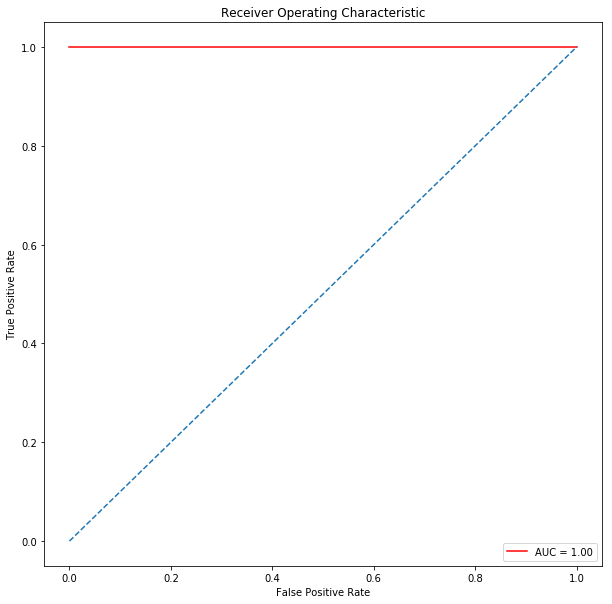

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Support Vector machine with polynomial Kernel

In [72]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [73]:
from sklearn.grid_search import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [74]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

1.0


In [75]:
print(model_svm.grid_scores_)

[mean: 0.51746, std: 0.00036, params: {'kernel': 'poly', 'gamma': 0.001, 'degree': 6, 'C': 500}, mean: 0.92814, std: 0.01278, params: {'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'C': 1}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'gamma': 1, 'degree': 5, 'C': 500}, mean: 0.99569, std: 0.00306, params: {'kernel': 'poly', 'gamma': 0.01, 'degree': 4, 'C': 100}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'gamma': 0.1, 'degree': 3, 'C': 100}, mean: 0.91183, std: 0.01184, params: {'kernel': 'poly', 'gamma': 0.001, 'degree': 2, 'C': 10}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'gamma': 0.1, 'degree': 3, 'C': 10}, mean: 0.99969, std: 0.00092, params: {'kernel': 'poly', 'gamma': 0.01, 'degree': 4, 'C': 500}, mean: 0.51746, std: 0.00036, params: {'kernel': 'poly', 'gamma': 0.0001, 'degree': 3, 'C': 1}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'gamma': 0.1, 'degree': 4, 'C': 100}, mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', '

In [76]:
print(model_svm.best_params_)

{'kernel': 'poly', 'gamma': 1, 'degree': 5, 'C': 500}


In [77]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [78]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

Text(0.5,0,'False Positive Rate')

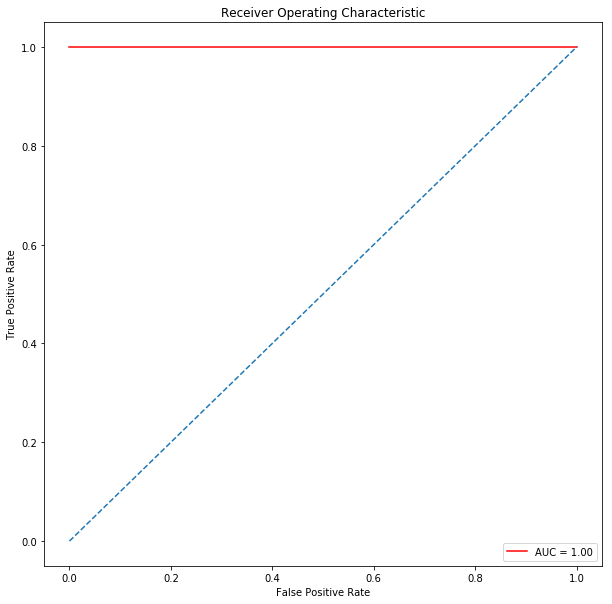

In [79]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

#tuned_parameters = {'min_samples_leaf': range(5,10,5), 'n_estimators' : range(50,200,50),
                    #'max_depth': range(5,15,5), 'max_features':range(5,20,5)
                    #}
               
model_RR.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
y_prob = model_RR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_RR.score(X_test, y_pred)

1.0

In [82]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [84]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [85]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

Text(0.5,0,'False Positive Rate')

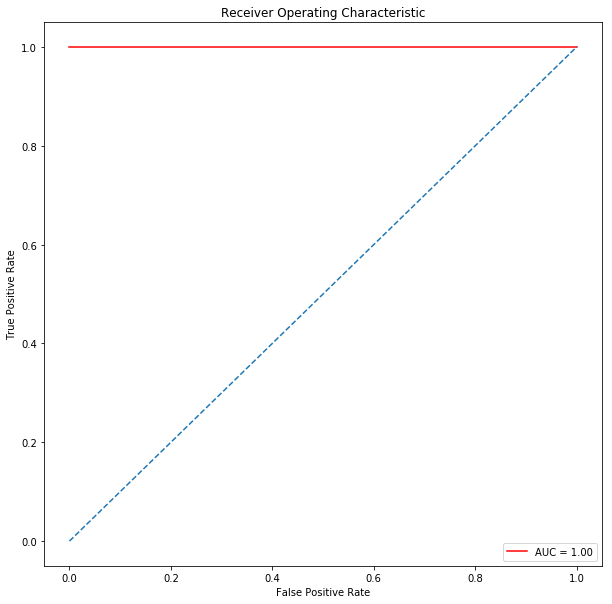

In [86]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Thus default Random forest model is giving us best accuracy.